In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
305,1248-DYXUB,Male,0,Yes,Yes,52,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.80,1229.1,No
4612,6723-CEGQI,Female,0,No,Yes,65,No,No phone service,DSL,No,...,No,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95,No
3597,7011-CVEUC,Male,0,Yes,No,25,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
6752,9928-BZVLZ,Female,0,No,No,12,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.1,No
3013,2065-MMKGR,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.1,No
2477,1212-GLHMD,Male,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,86.05,244.85,No
5556,5364-EVNIB,Male,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.80,973.45,Yes
2761,2408-WITXK,Female,1,No,No,10,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,34.70,329.8,Yes
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
5904,9402-CXWPL,Female,0,No,No,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Electronic check,98.90,6838.6,No


In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.shape


(7043, 21)

In [9]:
df.Churn.value_counts()[0]

5174

In [10]:
df.Churn.value_counts()[1]/df.shape[0]*100


26.536987079369588

In [11]:

df.drop('customerID',axis='columns',inplace=True)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
#Remove rows with space in TotalCharges
df1 = df[df.TotalCharges!=' ']

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
#all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


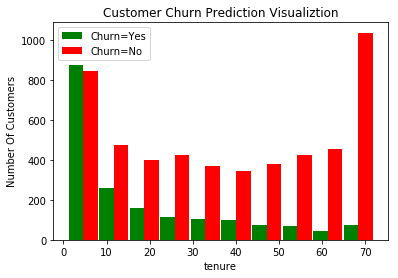

In [20]:

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

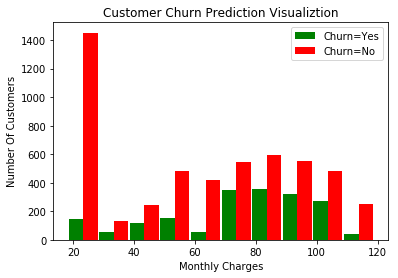

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [22]:
# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:

for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1606,0,1,1,1,72,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
853,1,0,0,0,5,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
6680,1,0,0,1,48,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
2779,0,0,0,0,9,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2634,0,0,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5812,0,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5959,1,0,1,1,33,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2944,0,0,0,0,12,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
684,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5917,0,0,0,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [40]:

df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [41]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [45]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [46]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

# Build a model (ANN) in tensorflow/keras

In [40]:
#!pip install tensorflow
import tensorflow as tf
#import tensorflow_addons 
#from tensorflow_addons import losses
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [41]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [62]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 777us/step - loss: 0.4936 - accuracy: 0.7550
Epoch 2/100
176/176 [==============================] - 0s 800us/step - loss: 0.4319 - accuracy: 0.7874
Epoch 3/100
176/176 [==============================] - 0s 788us/step - loss: 0.4251 - accuracy: 0.7943
Epoch 4/100
176/176 [==============================] - 0s 805us/step - loss: 0.4210 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 0s 788us/step - loss: 0.4177 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 0s 805us/step - loss: 0.4154 - accuracy: 0.7989
Epoch 7/100
176/176 [==============================] - 0s 800us/step - loss: 0.4144 - accuracy: 0.8023
Epoch 8/100
176/176 [==============================] - 0s 788us/step - loss: 0.4139 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 0s 794us/step - loss: 0.4114 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 0s 840us/step - l


reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

## Method 1: Undersampling

In [63]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [65]:
count_class_0, count_class_1

(5163, 1869)

In [66]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [67]:
# Traiin and test split 
#stratify=y  !!!

X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [69]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 820us/step - loss: 0.6300 - accuracy: 0.6559
Epoch 2/100
94/94 [==============================] - 0s 914us/step - loss: 0.5187 - accuracy: 0.7495
Epoch 3/100
94/94 [==============================] - 0s 838us/step - loss: 0.4941 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 806us/step - loss: 0.4864 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 817us/step - loss: 0.4827 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 742us/step - loss: 0.4767 - accuracy: 0.7759
Epoch 7/100
94/94 [==============================] - 0s 742us/step - loss: 0.4724 - accuracy: 0.7773
Epoch 8/100
94/94 [==============================] - 0s 752us/step - loss: 0.4701 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 0s 795us/step - loss: 0.4676 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 0s 849us/step - loss: 0.4655 - accura

#### Before Undersampling
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1033
         1.0       0.63      0.45      0.53       374

   

#### After Undersampling
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       374
           1       0.74      0.75      0.75       374


## Method2: Oversampling

In [70]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [71]:
# Traiin and test split 
#stratify=y  !!!

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [72]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 752us/step - loss: 0.5369 - accuracy: 0.7404
Epoch 2/100
259/259 [==============================] - 0s 763us/step - loss: 0.4911 - accuracy: 0.7597
Epoch 3/100
259/259 [==============================] - 0s 763us/step - loss: 0.4819 - accuracy: 0.7638
Epoch 4/100
259/259 [==============================] - 0s 752us/step - loss: 0.4777 - accuracy: 0.7689
Epoch 5/100
259/259 [==============================] - 0s 690us/step - loss: 0.4715 - accuracy: 0.7708
Epoch 6/100
259/259 [==============================] - 0s 694us/step - loss: 0.4686 - accuracy: 0.7725
Epoch 7/100
259/259 [==============================] - 0s 690us/step - loss: 0.4653 - accuracy: 0.7728
Epoch 8/100
259/259 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.77 - 0s 694us/step - loss: 0.4628 - accuracy: 0.7748
Epoch 9/100
259/259 [==============================] - 0s 690us/step - loss: 0.4596 - accuracy: 0.7791
Epoch 10/100
259/259 [=========

#### Before Undersampling
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1033
         1.0       0.63      0.45      0.53       374

   

#### After Undersampling
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       374
           1       0.74      0.75      0.75       374

#### After Oversampling
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.81      0.80      1033

## Method3: SMOTE

In [81]:
#!pip install imbalanced-learn

In [1]:
# check version number
import imblearn
print(imblearn.__version__)


0.8.0


In [30]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

#X_sm, y_sm = smote.fit_sample(X, y)
#y_sm.value_counts()

X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [38]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 821us/step - loss: 8.1421 - accuracy: 0.6705
Epoch 2/100
259/259 [==============================] - 0s 771us/step - loss: 0.7742 - accuracy: 0.7287
Epoch 3/100
259/259 [==============================] - 0s 744us/step - loss: 0.8887 - accuracy: 0.7282
Epoch 4/100
259/259 [==============================] - 0s 705us/step - loss: 1.0325 - accuracy: 0.7315
Epoch 5/100
259/259 [==============================] - 0s 701us/step - loss: 1.0222 - accuracy: 0.7436
Epoch 6/100
259/259 [==============================] - 0s 709us/step - loss: 0.9048 - accuracy: 0.7522
Epoch 7/100
259/259 [==============================] - 0s 717us/step - loss: 0.7907 - accuracy: 0.7699
Epoch 8/100
259/259 [==============================] - 0s 697us/step - loss: 0.8317 - accuracy: 0.7674
Epoch 9/100
259/259 [==============================] - 0s 697us/step - loss: 0.7604 - accuracy: 0.7713
Epoch 10/100
259/259 [==============================] - 0s 697us/step - l

259/259 [==============================] - 0s 767us/step - loss: 0.4606 - accuracy: 0.8241
Epoch 80/100
259/259 [==============================] - 0s 717us/step - loss: 0.4903 - accuracy: 0.8156
Epoch 81/100
259/259 [==============================] - 0s 694us/step - loss: 0.4039 - accuracy: 0.8324
Epoch 82/100
259/259 [==============================] - 0s 779us/step - loss: 0.5237 - accuracy: 0.8056
Epoch 83/100
259/259 [==============================] - 0s 771us/step - loss: 0.4928 - accuracy: 0.8140
Epoch 84/100
259/259 [==============================] - 0s 829us/step - loss: 0.5635 - accuracy: 0.8104
Epoch 85/100
259/259 [==============================] - 0s 717us/step - loss: 0.4416 - accuracy: 0.8222
Epoch 86/100
259/259 [==============================] - 0s 763us/step - loss: 0.5301 - accuracy: 0.8094
Epoch 87/100
259/259 [==============================] - 0s 759us/step - loss: 0.5211 - accuracy: 0.8107
Epoch 88/100
259/259 [==============================] - 0s 717us/step - loss:

#### Before Undersampling
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1033
         1.0       0.63      0.45      0.53       374

   

#### After Undersampling
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       374
           1       0.74      0.75      0.75       374

#### After Oversampling
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.81      0.80      1033

#### After SMOTE
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.83      0.87      0.85      1033

## Method4: Use of Ensemble with undersampling

In [43]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [44]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [47]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [48]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,18,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,56,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,72,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,4,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [49]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
# the below function for the line below

# we do it in batches 1495 each batch as the number of miniority class

#df_train = pd.concat([df3_class0[:,1495], df3_class1], axis = 1)

In [50]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [51]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 781us/step - loss: 52.7439 - accuracy: 0.5080
Epoch 2/100
94/94 [==============================] - 0s 795us/step - loss: 0.8574 - accuracy: 0.5756
Epoch 3/100
94/94 [==============================] - 0s 763us/step - loss: 0.7440 - accuracy: 0.6130
Epoch 4/100
94/94 [==============================] - 0s 742us/step - loss: 0.6624 - accuracy: 0.6763
Epoch 5/100
94/94 [==============================] - 0s 774us/step - loss: 0.7070 - accuracy: 0.6903
Epoch 6/100
94/94 [==============================] - 0s 838us/step - loss: 0.6872 - accuracy: 0.6870
Epoch 7/100
94/94 [==============================] - 0s 838us/step - loss: 0.5941 - accuracy: 0.7231
Epoch 8/100
94/94 [==============================] - 0s 967us/step - loss: 0.6289 - accuracy: 0.7244
Epoch 9/100
94/94 [==============================] - 0s 892us/step - loss: 0.6181 - accuracy: 0.7241
Epoch 10/100
94/94 [==============================] - 0s 752us/step - loss: 0.6416 - accur

94/94 [==============================] - 0s 967us/step - loss: 0.5330 - accuracy: 0.7522
Epoch 81/100
94/94 [==============================] - 0s 785us/step - loss: 0.5355 - accuracy: 0.7538
Epoch 82/100
94/94 [==============================] - 0s 828us/step - loss: 0.5647 - accuracy: 0.7528
Epoch 83/100
94/94 [==============================] - 0s 774us/step - loss: 0.5172 - accuracy: 0.7632
Epoch 84/100
94/94 [==============================] - 0s 763us/step - loss: 0.6705 - accuracy: 0.7331
Epoch 85/100
94/94 [==============================] - 0s 785us/step - loss: 0.5202 - accuracy: 0.7589
Epoch 86/100
94/94 [==============================] - 0s 795us/step - loss: 0.6029 - accuracy: 0.7508
Epoch 87/100
94/94 [==============================] - 0s 774us/step - loss: 0.7841 - accuracy: 0.7204
Epoch 88/100
94/94 [==============================] - 0s 795us/step - loss: 0.5801 - accuracy: 0.7445
Epoch 89/100
94/94 [==============================] - 0s 763us/step - loss: 0.5450 - accuracy: 

In [58]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 749us/step - loss: 14.8994 - accuracy: 0.5478
Epoch 2/100
94/94 [==============================] - 0s 795us/step - loss: 0.9361 - accuracy: 0.6940
Epoch 3/100
94/94 [==============================] - 0s 785us/step - loss: 1.0697 - accuracy: 0.6866
Epoch 4/100
94/94 [==============================] - 0s 795us/step - loss: 0.9225 - accuracy: 0.7117
Epoch 5/100
94/94 [==============================] - 0s 774us/step - loss: 0.9414 - accuracy: 0.7094
Epoch 6/100
94/94 [==============================] - 0s 774us/step - loss: 0.6468 - accuracy: 0.7368
Epoch 7/100
94/94 [==============================] - 0s 774us/step - loss: 1.1847 - accuracy: 0.6977
Epoch 8/100
94/94 [==============================] - 0s 785us/step - loss: 1.2406 - accuracy: 0.6930
Epoch 9/100
94/94 [==============================] - 0s 774us/step - loss: 1.3005 - accuracy: 0.6890
Epoch 10/100
94/94 [==============================] - 0s 817us/step - loss: 0.9123 - accur

94/94 [==============================] - 0s 731us/step - loss: 0.5967 - accuracy: 0.7498
Epoch 82/100
94/94 [==============================] - 0s 742us/step - loss: 0.8931 - accuracy: 0.7134
Epoch 83/100
94/94 [==============================] - 0s 709us/step - loss: 0.7536 - accuracy: 0.7264
Epoch 84/100
94/94 [==============================] - 0s 709us/step - loss: 0.7216 - accuracy: 0.7204
Epoch 85/100
94/94 [==============================] - 0s 709us/step - loss: 0.8103 - accuracy: 0.7191
Epoch 86/100
94/94 [==============================] - 0s 709us/step - loss: 0.8483 - accuracy: 0.7247
Epoch 87/100
94/94 [==============================] - 0s 763us/step - loss: 0.8621 - accuracy: 0.7241
Epoch 88/100
94/94 [==============================] - 0s 806us/step - loss: 0.8040 - accuracy: 0.7217
Epoch 89/100
94/94 [==============================] - 0s 817us/step - loss: 0.7918 - accuracy: 0.7291
Epoch 90/100
94/94 [==============================] - 0s 763us/step - loss: 0.8270 - accuracy: 

In [53]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 797us/step - loss: 43.5701 - accuracy: 0.5256
Epoch 2/100
83/83 [==============================] - 0s 809us/step - loss: 0.8051 - accuracy: 0.6414
Epoch 3/100
83/83 [==============================] - 0s 805us/step - loss: 0.7280 - accuracy: 0.6843
Epoch 4/100
83/83 [==============================] - 0s 768us/step - loss: 0.6682 - accuracy: 0.7230
Epoch 5/100
83/83 [==============================] - 0s 780us/step - loss: 0.5691 - accuracy: 0.7328
Epoch 6/100
83/83 [==============================] - 0s 768us/step - loss: 0.5578 - accuracy: 0.7416
Epoch 7/100
83/83 [==============================] - 0s 780us/step - loss: 0.6353 - accuracy: 0.7416
Epoch 8/100
83/83 [==============================] - 0s 768us/step - loss: 0.8377 - accuracy: 0.7051
Epoch 9/100
83/83 [==============================] - 0s 768us/step - loss: 0.7799 - accuracy: 0.7245
Epoch 10/100
83/83 [==============================] - 0s 793us/step - loss: 0.6400 - accur

83/83 [==============================] - 0s 817us/step - loss: 0.5278 - accuracy: 0.7564
Epoch 82/100
83/83 [==============================] - 0s 841us/step - loss: 0.5042 - accuracy: 0.7727
Epoch 83/100
83/83 [==============================] - 0s 841us/step - loss: 0.5266 - accuracy: 0.7556
Epoch 84/100
83/83 [==============================] - 0s 817us/step - loss: 0.5349 - accuracy: 0.7545
Epoch 85/100
83/83 [==============================] - 0s 841us/step - loss: 0.4788 - accuracy: 0.7799
Epoch 86/100
83/83 [==============================] - 0s 829us/step - loss: 0.4842 - accuracy: 0.7731
Epoch 87/100
83/83 [==============================] - 0s 817us/step - loss: 0.4920 - accuracy: 0.7685
Epoch 88/100
83/83 [==============================] - 0s 731us/step - loss: 0.5211 - accuracy: 0.7696
Epoch 89/100
83/83 [==============================] - 0s 719us/step - loss: 0.6141 - accuracy: 0.7469
Epoch 90/100
83/83 [==============================] - 0s 683us/step - loss: 0.6347 - accuracy: 

In [59]:
# voting
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0



In [61]:

#cl_rep = classification_report(y_test, y_pred_final)
#print(cl_rep)

### y_pred1

In [67]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### y_pred2

In [68]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.63      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.79      0.78      0.78      1407



### y_pred3

In [69]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



###  y_pred_final

In [70]:
print(classification_report(y_test,  y_pred_final))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407

